## Text Classification - Movie Review ##
### Objective is to classify the review as negative or positive ###
### We'll use TensorFlow, Keras and IMDB database information ###

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Data Loading and Understanding ###

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 5s 0us/step


In [3]:
type(train_data)

numpy.ndarray

In [4]:
train_data.shape

(25000,)

Info:
https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
    
IMDB Movie reviews sentiment classification
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 
For convenience, words are indexed by overall frequency in the dataset, 
so that for instance the integer "3" encodes the 3rd most frequent word in the data. 
This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
len(train_data[0])

218

In [7]:
len(train_data[7])

562

#### Convert this coding to words ####

In [33]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

In [34]:
type(word_index)

dict

In [35]:
len(word_index)

88584

In [36]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [37]:
word_index['the']

1

In [38]:
# understanding the data
## sorting the dictionary by value
sorted(word_index.items(), key=lambda kv: kv[1])

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10),
 ('this', 11),
 ('that', 12),
 ('was', 13),
 ('as', 14),
 ('for', 15),
 ('with', 16),
 ('movie', 17),
 ('but', 18),
 ('film', 19),
 ('on', 20),
 ('not', 21),
 ('you', 22),
 ('are', 23),
 ('his', 24),
 ('have', 25),
 ('he', 26),
 ('be', 27),
 ('one', 28),
 ('all', 29),
 ('at', 30),
 ('by', 31),
 ('an', 32),
 ('they', 33),
 ('who', 34),
 ('so', 35),
 ('from', 36),
 ('like', 37),
 ('her', 38),
 ('or', 39),
 ('just', 40),
 ('about', 41),
 ("it's", 42),
 ('out', 43),
 ('has', 44),
 ('if', 45),
 ('some', 46),
 ('there', 47),
 ('what', 48),
 ('good', 49),
 ('more', 50),
 ('when', 51),
 ('very', 52),
 ('up', 53),
 ('no', 54),
 ('time', 55),
 ('she', 56),
 ('even', 57),
 ('my', 58),
 ('would', 59),
 ('which', 60),
 ('only', 61),
 ('story', 62),
 ('really', 63),
 ('see', 64),
 ('their', 65),
 ('had', 66),
 ('can', 67),
 ('were', 68),
 ('me', 69),
 ('well', 70),
 ('than', 71),


In [39]:
## sorting the dictionary by key
sorted(word_index.items(), key=lambda kv: kv[0])

[('\x08\x08\x08\x08a', 68893),
 ('\x10own', 70879),
 ("'", 755),
 ("''", 17448),
 ("''a", 57351),
 ("''after", 64015),
 ("''bad", 72030),
 ("''cannibal", 58448),
 ("''clients''", 80824),
 ("''dark''", 66872),
 ("''empire", 52876),
 ("''family", 85943),
 ("''gaslight''", 58747),
 ("''heart''", 75354),
 ("''high", 66908),
 ("''holy", 83565),
 ("''human''", 61364),
 ("''humans''", 88090),
 ("''i'm", 61351),
 ("''if", 62727),
 ("''inuyasha''", 61770),
 ("''little''", 58164),
 ("''maison", 85895),
 ("''ned''", 62202),
 ("''negative''", 76149),
 ("''nice", 57008),
 ("''oh", 45418),
 ("''on", 66910),
 ("''oversexed''", 75509),
 ("''peeping", 81867),
 ("''professionals''", 76109),
 ("''ranma", 44903),
 ("''raptors''", 70722),
 ("''return", 55138),
 ("''saint", 51394),
 ("''scarface''", 51257),
 ("''sea", 49404),
 ("''talent", 84926),
 ("''terrorists''", 81627),
 ("''the", 20197),
 ("''their", 84051),
 ("''this", 66430),
 ("''thunderball", 87604),
 ("''troubled''", 79833),
 ("''unpleasant", 664

In [40]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [46]:
len(word_index)

88588

In [49]:
word_index
# Note:
# initially it was: 'fawn': 34701, 'tsukino': 52006,...
# now: 'fawn': 34704, 'tsukino': 52009,
# so basically we shifted the Values by 3
# And added 4 more Key-Value pairs


{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [41]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [42]:
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [43]:
reverse_word_index[1]

'<START>'

In [44]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [45]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [48]:
decode_review(train_data[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

### Data Preparation ###

In [50]:
len(train_data[2])

141

In [51]:
len(train_data[12])

117

In [52]:
type(train_data[2])

list

In [53]:
train_data[2]

[1,
 14,
 47,
 8,
 30,
 31,
 7,
 4,
 249,
 108,
 7,
 4,
 5974,
 54,
 61,
 369,
 13,
 71,
 149,
 14,
 22,
 112,
 4,
 2401,
 311,
 12,
 16,
 3711,
 33,
 75,
 43,
 1829,
 296,
 4,
 86,
 320,
 35,
 534,
 19,
 263,
 4821,
 1301,
 4,
 1873,
 33,
 89,
 78,
 12,
 66,
 16,
 4,
 360,
 7,
 4,
 58,
 316,
 334,
 11,
 4,
 1716,
 43,
 645,
 662,
 8,
 257,
 85,
 1200,
 42,
 1228,
 2578,
 83,
 68,
 3912,
 15,
 36,
 165,
 1539,
 278,
 36,
 69,
 2,
 780,
 8,
 106,
 14,
 6905,
 1338,
 18,
 6,
 22,
 12,
 215,
 28,
 610,
 40,
 6,
 87,
 326,
 23,
 2300,
 21,
 23,
 22,
 12,
 272,
 40,
 57,
 31,
 11,
 4,
 22,
 47,
 6,
 2307,
 51,
 9,
 170,
 23,
 595,
 116,
 595,
 1352,
 13,
 191,
 79,
 638,
 89,
 2,
 14,
 9,
 8,
 106,
 607,
 624,
 35,
 534,
 6,
 227,
 7,
 129,
 113]

In [57]:
# We'll convert each review (which is a list of integers) to of same length by padding at the end


In [56]:
max( len(train_data[x]) for x in range(25000)) # max length of review in training set

2494

In [58]:
min( len(train_data[x]) for x in range(25000)) # min length of review in training set

11

In [60]:
import statistics

statistics.mean( len(train_data[x]) for x in range(25000)) # mean length of review in training set

238.71364

In [61]:
# lets take 256 as the max length for the reviews

In [62]:
word_index["<PAD>"]

0

In [92]:
train_data.shape

(25000, 256)

In [63]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [64]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [65]:
len(train_data[0]), len(train_data[1])

(256, 256)

## Building the Model ##

In [66]:
vocab_size = 10000

model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16))
# Understanding of word embeddings
# each word is represented as vector of numbers - this is the embedding for the word
# so if we have 10,000 words in vocabulary and we decide that each word will be represented as 16x1 vector,
# then the embedding matrix is 16x 10000 matrix where each column corresponds to one word
# the embedding values will be learnt through training


model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keras embedding layer - output shape - (None, None, 16)
# Here, first None -> batch size, second None -> input length, 16 -> output length

# Global Average pooling 1D - output shape - (None, 16)
# None -> batch size, 16 -> output features 

In [67]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

### Create validation set ###

In [68]:
x_val = train_data[:10000] # first 10,000 data
partial_x_train = train_data[10000:] # rest of the data

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Train the Model ##

In [69]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 8s 560us/sample - loss: 0.6919 - acc: 0.5734 - val_loss: 0.6901 - val_acc: 0.6266
Epoch 2/40
15000/15000 [==============================] - 1s 76us/sample - loss: 0.6863 - acc: 0.7047 - val_loss: 0.6822 - val_acc: 0.7215
Epoch 3/40
15000/15000 [==============================] - 1s 92us/sample - loss: 0.6734 - acc: 0.7457 - val_loss: 0.6655 - val_acc: 0.7550
Epoch 4/40
15000/15000 [==============================] - 1s 87us/sample - loss: 0.6499 - acc: 0.7641 - val_loss: 0.6382 - val_acc: 0.7587
Epoch 5/40
15000/15000 [==============================] - 2s 107us/sample - loss: 0.6145 - acc: 0.7944 - val_loss: 0.6003 - val_acc: 0.7869
Epoch 6/40
15000/15000 [==============================] - 1s 92us/sample - loss: 0.5680 - acc: 0.8143 - val_loss: 0.5557 - val_acc: 0.8050
Epoch 7/40
15000/15000 [==============================] - 2s 134us

## Evaluate the Model ##

In [70]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 41us/sample - loss: 0.3375 - acc: 0.8706
[0.3374585014820099, 0.87056]


### Pictorial representation - history object ###

In [71]:
history

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [73]:
# 'val_loss', 'val_acc' - are for validation set 

In [74]:
history_dict['loss']

[0.6919220288276673,
 0.6862857576370239,
 0.6734466571807861,
 0.6499093930244446,
 0.6145040915489197,
 0.567978950881958,
 0.5168175285975138,
 0.4669488637129466,
 0.4218726145585378,
 0.3830448446909587,
 0.35083648994763694,
 0.32402351721127826,
 0.30215439817110695,
 0.2825365991751353,
 0.2660643157164256,
 0.25129507280985514,
 0.23757334972222646,
 0.22543544765313467,
 0.2144490908940633,
 0.20455246393680573,
 0.19442140117486317,
 0.1859607310295105,
 0.1774601255496343,
 0.1700903033574422,
 0.16251480322678885,
 0.1557951111396154,
 0.149412726632754,
 0.14332893189589183,
 0.13794678848584493,
 0.13231962800423305,
 0.12663899064064027,
 0.12154505333503088,
 0.11662835057973862,
 0.11222681120236715,
 0.10805960073073705,
 0.10372076239585877,
 0.09948046240011851,
 0.09562054428259531,
 0.09247028284072877,
 0.08845519635677337]

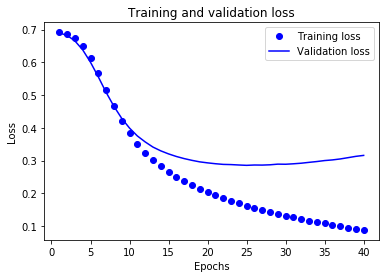

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

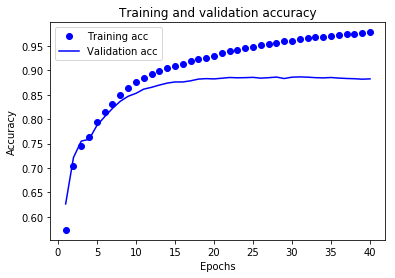

In [78]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [83]:
x_val[2], y_val[2] ## y = 0 -> negative review; y = 1 -> positive review

(array([   1,   14,   47,    8,   30,   31,    7,    4,  249,  108,    7,
           4, 5974,   54,   61,  369,   13,   71,  149,   14,   22,  112,
           4, 2401,  311,   12,   16, 3711,   33,   75,   43, 1829,  296,
           4,   86,  320,   35,  534,   19,  263, 4821, 1301,    4, 1873,
          33,   89,   78,   12,   66,   16,    4,  360,    7,    4,   58,
         316,  334,   11,    4, 1716,   43,  645,  662,    8,  257,   85,
        1200,   42, 1228, 2578,   83,   68, 3912,   15,   36,  165, 1539,
         278,   36,   69,    2,  780,    8,  106,   14, 6905, 1338,   18,
           6,   22,   12,  215,   28,  610,   40,    6,   87,  326,   23,
        2300,   21,   23,   22,   12,  272,   40,   57,   31,   11,    4,
          22,   47,    6, 2307,   51,    9,  170,   23,  595,  116,  595,
        1352,   13,  191,   79,  638,   89,    2,   14,    9,    8,  106,
         607,  624,   35,  534,    6,  227,    7,  129,  113,    0,    0,
           0,    0,    0,    0,    0, 

In [84]:
decode_review(x_val[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

### So we experimented with sentiment analysis type of problem in this notebook and got reasonable result ###


In [111]:
# lets experiment with my own review - 'this is a nice/ horrible movie'
word_index['<START>'], word_index['this'], word_index['is'], word_index['a'], word_index['horrible'], word_index['movie'], word_index['<PAD>']

(1, 14, 9, 6, 527, 20, 0)

In [112]:
my_x = [1, 14, 9, 6, 527, 20]

In [113]:
len(my_x)

6

In [114]:
for i in range(len(my_x),256):
    my_x.append(0)

In [115]:
len(my_x)

256

In [116]:
my_X = np.array([my_x])

In [117]:
my_X.shape

(1, 256)

In [118]:
type(my_X)

numpy.ndarray

In [119]:
model.predict(x=my_X)

array([[0.32895058]], dtype=float32)

In [ ]:
## It works :) ##